In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import seaborn as sns
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler

In [2]:

np.random.seed(42)
normal_data = 0.3 * np.random.randn(100, 2)  # 2 features
normal_data = np.r_[normal_data + 2, normal_data - 2]  # Two clusters

# Add some outliers
outliers = np.random.uniform(low=-4, high=4, size=(20, 2))

# Combine
X = np.vstack([normal_data, outliers])

In [3]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [4]:
osvm = OneClassSVM(kernel='rbf', gamma=0.1, nu=0.05)  # nu is the proportion of outliers you expect
osvm.fit(X_scaled)

OneClassSVM(gamma=0.1, nu=0.05)

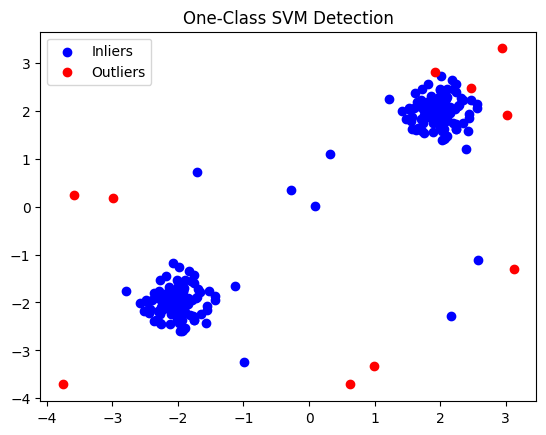

In [5]:
y_pred = osvm.predict(X_scaled)

# 1 = inlier, -1 = outlier
inliers = X[y_pred == 1]
outliers = X[y_pred == -1]

# Plotting
plt.scatter(inliers[:, 0], inliers[:, 1], c='blue', label='Inliers')
plt.scatter(outliers[:, 0], outliers[:, 1], c='red', label='Outliers')
plt.legend()
plt.title("One-Class SVM Detection")
plt.show()